# Phase 2 Project: Advising On Influences On Sale Price in King County, WA

* Student name: Rebecca Frost-Brewer
* Student pace: Flex
* Scheduled project review date/time: April 20, 2022, 9AM
* Instructor name: Claude Fried
* Blog post URL:


# Business Understanding

As the data scientist for Emerald City Realtors, a realty firm dedicated to affordable housing, I have been asked by our lead executives to analyze sales data from 2014-2015 in order to create a list of advice the realtors can provide to prospective homesellers about what they can do to increase the estimated value of their homes, and by what amount.

The stakeholders here are the lead executives of Emerald City Realtors who are seeking to solve a real-world problem: providing prospective homesellers of affordable homes advice on how to increase the estimated value of their home, and by what amount.

Data-informed recommendations based on data analysis will help lead executives accurately and confidently advise prospective homesellers within the affordable home market.

# Data Understanding

This project uses the King County House Sales dataset because Emerald City Realtors and its prospective homesellers are all based in King County. The dataset includes all data of single-family home sales from 2014-2015. The dataset itself can be found in `kc_house_data.csv` in the data folder of this GitHub repository along with the descriptions of the features, found in `column_names.md` Further information about the features can be found on the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

# Data Preparation

## Data Cleaning and Processing

### Import packages and libraries

In [1]:
# Import packages/libraries

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data

kcdf = pd.read_csv("data/kc_house_data.csv")

In [3]:
# View first five entries

kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# View information on the dataset

kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

This dataset includes 21,597 home sales with 20 features related to each sale, including price, number of bedrooms and bathrooms, square feet of living space, grade, condition, zipcode, etc.

### Data Processing

Before we move into analysis, we need to clean and process our data, so that it's best prepared for sound analysis.

First, we can see that `date` and `sqft_basement` are numerical features, but currently coded as objects, so we need to fix that.

In [5]:
# Convert date to datetime format then extract the year into a separate column

kcdf['date'] = pd.to_datetime(kcdf['date'].astype(str).str.replace('/', '-'), errors='coerce')
kcdf['sale_year'] = pd.DatetimeIndex(kcdf['date']).year

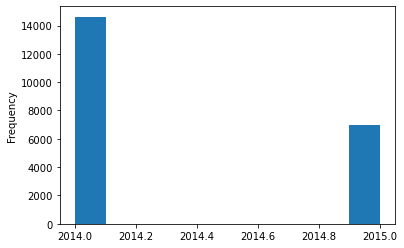

In [6]:
# Let's check the distribution of the sale year to see the timeframe of our dataset

kcdf['sale_year'].plot(kind = 'hist');

In [7]:
# It looks like there are only two years of data

kcdf['sale_year'].unique()

array([2014, 2015])

This sales data only includes home sales from 2014 and 2015, thus we can drop the sale date information since we know this characteristic of the dataset. We can also drop the ID column as that column is unnecessary for our analysis because it doesn't provide any descriptive information about the home sale.

In [8]:
kcdf = kcdf.drop(columns = ['date', 'sale_year', 'id'])

In [9]:
kcdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


After dropping those columns, let's explore `sqft_basement` as we know it's currently coded as an object, but it should be similar to `sqft_living` as a numerical, continuous feature.

In [10]:
kcdf['sqft_basement'].isna().sum()

# Do we have any missing values?

0

In [11]:
kcdf['sqft_basement'].value_counts()

# Missing data represented by '?' - 454 observations missing data

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2180.0        1
4130.0        1
792.0         1
3000.0        1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
kcdf.sqft_basement.value_counts(normalize = True)

# ? accounts for 2% of the data

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2180.0    0.000046
4130.0    0.000046
792.0     0.000046
3000.0    0.000046
1245.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [13]:
# Replace the ? with 0.0 since it's such a small percentage and 60% of the dataset are 0.0s

kcdf['sqft_basement'].replace('?', 0.0, inplace = True)

In [14]:
kcdf['sqft_basement'].value_counts()

# Not sure why these are listed separately
# 0.0      12826
# 0.0        454

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
2180.0        1
4130.0        1
792.0         1
3000.0        1
283.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [15]:
# Make sure sqft_basement is an int, not float (to match sqft_above)

kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(float).astype(int)

In [16]:
kcdf.info()

# sqft_basement now correct datatype
# Categorical variables: waterfront, view, condition, grade
# Check NaNs first before we move on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [17]:
kcdf.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# Let's start with yr_renovated and try to figure out how to handle the missing yr_renovated values

print('Percentage of Null Yr Renovated Values:', len(kcdf[kcdf.yr_renovated.isna()])/ len(kcdf))
print('Number of Unique Yr Renovated Values:', kcdf.yr_renovated.nunique())

Percentage of Null Yr Renovated Values: 0.17789507802009538
Number of Unique Yr Renovated Values: 70


In considering what should we replace the NaN value with, if we don't know if or when it was renovated, we don't want to make any assumption without verifying records. To that end, let's drop those sales where renovation year is unknown.

In [19]:
kcdf.dropna(subset = ['yr_renovated'], inplace = True)

In [20]:
kcdf['yr_renovated'].isna().sum()

0

In [21]:
kcdf['yr_renovated'].value_counts()

# 17,011 homes have not been renovated

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
# Create new feature of reno_status, indicating whether it's been renovated or not

kcdf['reno_status'] = kcdf.yr_renovated.map(lambda x: 'No' if x == 0 else 'Yes')

In [23]:
kcdf.isna().sum()

# Still have NaNs with waterfront and view

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1946
view               51
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
reno_status         0
dtype: int64

In [24]:
# Next, let's look at waterfront and try to figure out how to handle the missing values

print('Percentage of Null Waterfront Values:', len(kcdf[kcdf.waterfront.isna()])/ len(kcdf))
print('Number of Unique Waterfront Values:', kcdf.waterfront.nunique())

Percentage of Null Waterfront Values: 0.1096029287524641
Number of Unique Waterfront Values: 2


In [25]:
kcdf[['waterfront']].value_counts(normalize = True)

# 99% of observations are NO

waterfront
NO            0.992346
YES           0.007654
dtype: float64

In [26]:
# Given that 99% of sales have NO waterfront, we will replace the 10% of NaNs with NO

kcdf['waterfront'] = kcdf['waterfront'].fillna(value = 'NO')

In [27]:
kcdf.isna().sum()

# Lastly, need to deal with view

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             51
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
reno_status       0
dtype: int64

In [28]:
print('Percentage of Null View Values:', len(kcdf[kcdf.view.isna()])/ len(kcdf))
print('Number of Unique View Values:', kcdf.view.nunique())

Percentage of Null View Values: 0.0028724303013235707
Number of Unique View Values: 5


In [29]:
kcdf[['view']].value_counts(normalize = True)

view     
NONE         0.902169
AVERAGE      0.044736
GOOD         0.022763
FAIR         0.015646
EXCELLENT    0.014686
dtype: float64

In [30]:
# Only 5 observations are missing data and 90% of observations are NONE
# Replace NaNs with NONE

kcdf['view'] = kcdf['view'].fillna(value = 'NONE')

In [31]:
kcdf.isna().sum()

# Great! No more missing values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
reno_status      0
dtype: int64

In [32]:
kcdf.info()

# Upon further inspection, zipcode, which a "number" is actually more a category in the digit values are not
# associated with a value, but before we recode the zipcode to a string, do we need the feature in our dataset?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17755 non-null  float64
 1   bedrooms       17755 non-null  int64  
 2   bathrooms      17755 non-null  float64
 3   sqft_living    17755 non-null  int64  
 4   sqft_lot       17755 non-null  int64  
 5   floors         17755 non-null  float64
 6   waterfront     17755 non-null  object 
 7   view           17755 non-null  object 
 8   condition      17755 non-null  object 
 9   grade          17755 non-null  object 
 10  sqft_above     17755 non-null  int64  
 11  sqft_basement  17755 non-null  int64  
 12  yr_built       17755 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        17755 non-null  int64  
 15  lat            17755 non-null  float64
 16  long           17755 non-null  float64
 17  sqft_living15  17755 non-null  int64  
 18  sqft_l

The real-world problem is providing data-driven advice on how prospective homesellers (of affordable homes) can increase the estimated value of their home, and by what amount. Emerald City Realtors serves all of King County, so the recommendations provided to homesellers need to be broad to encompass all of the county and not specific based on location. To that end, we can drop `zipcode`, `lat`, and `long`.

Further, sellers cannot control the size of their lot nor can they control the lot size or square feet of living space of their 15 closest neighbors.

Therefore, we can confidently drop these features from the dataframe.

In [33]:
kcdf.drop(columns = ['zipcode', 'lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [34]:
kcdf.info()

# Great. Our categorical features are: waterfront, view, condition, grade, zipcode, reno status

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17755 non-null  float64
 1   bedrooms       17755 non-null  int64  
 2   bathrooms      17755 non-null  float64
 3   sqft_living    17755 non-null  int64  
 4   floors         17755 non-null  float64
 5   waterfront     17755 non-null  object 
 6   view           17755 non-null  object 
 7   condition      17755 non-null  object 
 8   grade          17755 non-null  object 
 9   sqft_above     17755 non-null  int64  
 10  sqft_basement  17755 non-null  int64  
 11  yr_built       17755 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  reno_status    17755 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 2.0+ MB


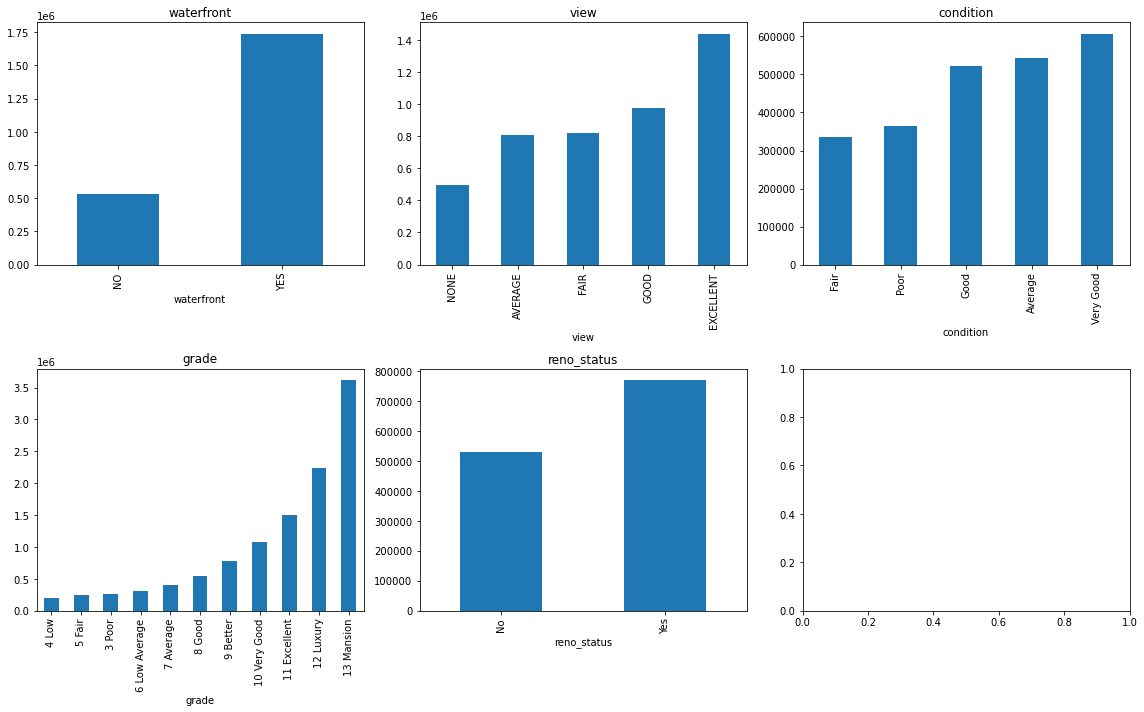

In [35]:
# Let's visualize our categorical variables to see relationship to mean sale price for exploratory purposes

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

categoricals = ['waterfront', 'view', 'condition', 'grade', 'reno_status']

for col, ax in zip(categoricals, axes.flatten()):
    (kcdf.groupby(col)              # group values together by column of interest
        .mean()['price']            # take the mean of the saleprice for each group
        .sort_values()              # sort the groups in ascending order
        .plot
        .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)               # Make the title the name of the column
    
fig.tight_layout()

Our initial observations indicate that waterfront, excellent views, renovations, and mansions all have exceptionally high sale prices, which makes sense.

However, in order for us to conduct our analysis, these categorical variables need to be transformed for use in regression models. We will create dummy variables, with each category converted into a new column, and each categorical "level" assigned a 1 or 0 to that column, representing whether or not that observation (sale) has that feature or not.

When getting dummies, we want to avoid the dummy variable trap and be do so by passing `drop_first = True` to `get_dummies()`

In [36]:
# Create our dummy variables for the categorical features

waterfront_dummies = pd.get_dummies(kcdf['waterfront'], prefix = 'waterfront', drop_first = True)
view_dummies = pd.get_dummies(kcdf['view'], prefix = 'view', drop_first = True)
cond_dummies = pd.get_dummies(kcdf['condition'], prefix = 'cond', drop_first = True)
grade_dummies = pd.get_dummies(kcdf['grade'], prefix = 'grade', drop_first = True)
reno_dummies = pd.get_dummies(kcdf['reno_status'], prefix = 'reno', drop_first = True)

In [37]:
# Drop the original column and concatenate our dummy variable columns with our original dataframe

kcdf = kcdf.drop(['waterfront', 'view', 'condition', 'grade', 'reno_status'], axis = 1)
kcdf_clean = pd.concat([kcdf, waterfront_dummies, view_dummies, cond_dummies, grade_dummies, reno_dummies], axis = 1)

In [38]:
kcdf_clean.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,waterfront_YES,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,reno_Yes
0,221900.0,3,1.00,1180,1.0,1180,0,1955,0.0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,2.0,2170,400,1951,1991.0,0,...,0,0,0,0,0,0,1,0,0,1
3,604000.0,4,3.00,1960,1.0,1050,910,1965,0.0,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680,1.0,1680,0,1987,0.0,0,...,0,0,0,0,0,0,0,1,0,0
5,1230000.0,4,4.50,5420,1.0,3890,1530,2001,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,2.0,1715,0,1995,0.0,0,...,0,0,0,0,0,0,1,0,0,0
7,291850.0,3,1.50,1060,1.0,1060,0,1963,0.0,0,...,0,0,0,0,0,0,1,0,0,0
8,229500.0,3,1.00,1780,1.0,1050,730,1960,0.0,0,...,0,0,0,0,0,0,1,0,0,0
9,323000.0,3,2.50,1890,2.0,1890,0,2003,0.0,0,...,0,0,0,0,0,0,1,0,0,0
10,662500.0,3,2.50,3560,1.0,1860,1700,1965,0.0,0,...,0,0,0,0,0,0,0,1,0,0


At this juncture, let's recall the real-world business problem. I am providing the lead executives of Emerald City Realtors with advice on how prospective homesellers of affordable homes can increase the estimated value of their homes, and by what amount. 

Since we know the clients our executives will be advising sellers of affordable homes, let's filter out the upper outliers in the top 5% of observations, so that our analysis does not include exorbinately high sale prices, which are not applicable to the audience of the executives at Emerald City Realtors.

In [39]:
# Remove top 5% of outliers

kcdf_clean = kcdf_clean.query('price < price.quantile(.95)')

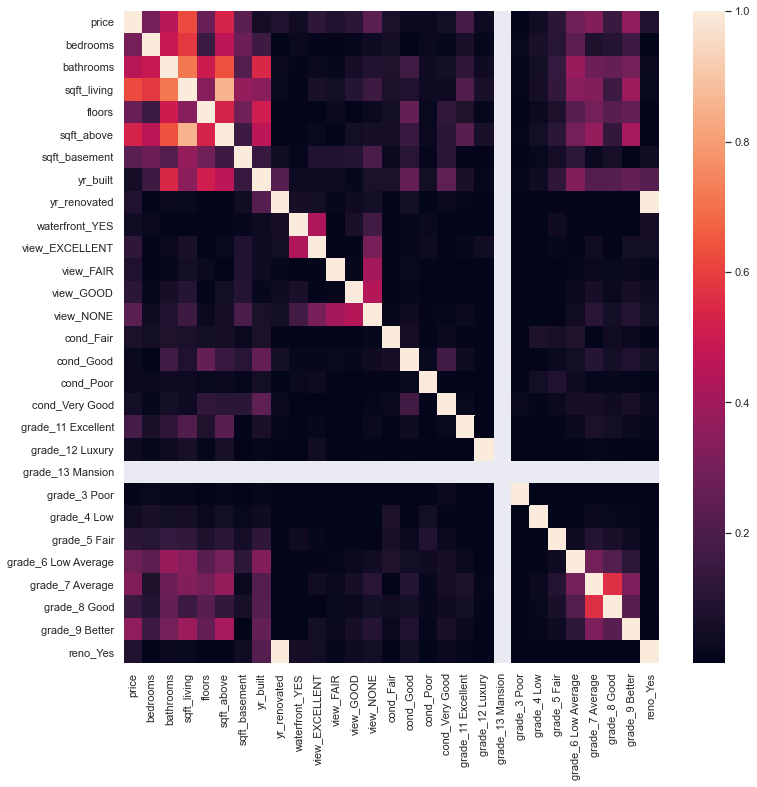

In [40]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap method to depict the relationships between the features visually
sns.heatmap(kcdf_clean.corr().abs());

In [41]:
# Why the NaNs for mansion? We dropped the top 5% of observations, which makes sense that would result in NaNs
# for mansions

kcdf_clean['grade_13 Mansion'].value_counts()

0    16842
Name: grade_13 Mansion, dtype: int64

In [42]:
# So we can drop this category column

kcdf_clean.drop(columns = ['grade_13 Mansion'], inplace = True)

In [43]:
# Let's check the correlations in an easy-to-read table
# 0.7-0.9 highly correlated
# 0.5-0.7 moderately correlated

kcdf_corrs = kcdf_clean.corr()['price'].map(abs).sort_values(ascending = False)
kcdf_corrs

# sqft_living = 0.62
# sqft_above = 0.53
# bathrooms = 0.46

price                  1.000000
sqft_living            0.624321
sqft_above             0.531087
bathrooms              0.455451
grade_9 Better         0.359543
grade_7 Average        0.326402
bedrooms               0.297122
grade_6 Low Average    0.279470
floors                 0.270742
view_NONE              0.237247
sqft_basement          0.234705
grade_11 Excellent     0.182400
grade_8 Good           0.149077
view_EXCELLENT         0.123597
grade_5 Fair           0.115553
view_GOOD              0.114707
yr_renovated           0.089607
reno_Yes               0.089180
view_FAIR              0.085603
cond_Fair              0.072803
yr_built               0.058539
cond_Very Good         0.050956
waterfront_YES         0.045684
grade_4 Low            0.043184
grade_12 Luxury        0.034396
cond_Good              0.030014
cond_Poor              0.028589
grade_3 Poor           0.007958
Name: price, dtype: float64

This table of correlations shows that the square feet of living space has the strongest correlation with sale price at 0.624, followed by square feet of living space above ground and number of bathrooms, at 0.531 and 0.455, respectively.

In [44]:
# Let's look at multicollinearity and see which features are most highly correlated pairs

# Create a new dataframe of the absolute values of the correlations
pairs_df = kcdf_clean.corr().abs().stack().reset_index().sort_values(0, ascending=False)
pairs_df['pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['pairs'], inplace = True)
pairs_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
pairs_df.columns = ['cc']
pairs_df.drop_duplicates(inplace=True)

# Filter for correlation coefficients less than 1 and greater than 0.75
pairs_df[(pairs_df.cc>.75) & (pairs_df.cc<1)]

,cc
pairs,
"(reno_Yes, yr_renovated)",0.999966
"(sqft_above, sqft_living)",0.852243


Addressing multicollinearity is important to ensure our models are accurate and analyses are not noisy with highly correlated pairs clouding interpretations.

In [45]:
# Given our business problem, we can drop yr_renovated and sqft_above since these are things sellers can't
# necessarily change

# Drop these columns to avoid multicollinearity affecting regression results
kcdf_clean.drop(columns = ['yr_renovated', 'sqft_above'], inplace = True)

# Modeling

## Baseline Model

This is our extremely simple model we will use for comparison throughout our investigation on the features that may affect sale price and to what degree.

In [46]:
# Create our X and y for models
y_target = kcdf_clean['price']
X_sqftliving = kcdf_clean['sqft_living']

In [68]:
# Run the baseline regression model 

baseline = sm.OLS(y_target, sm.add_constant(X_sqftliving))

results_baseline = baseline.fit()
print(results_baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:24:09   Log-Likelihood:            -2.2610e+05
No. Observations:               16842   AIC:                         4.522e+05
Df Residuals:                   16840   BIC:                         4.522e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.442e+05   3460.976     41.671      

### Regression Results: Baseline Model

**Findings**
Our dependent, target variable is sale price and our explanatory, independent variable is square feet of living space (sqft_living). This model's performance is fine - it explains 39% of variance in the data.

The F-test measures the significance of the model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. This model F-statistic has a p-value less than .05 and thus is statistically significant such that the sqft_living feature is statistically significant in predicting sale price.

The correlation coefficient of sqft_living has a p-value less that 0.05, so it is statistically signifcant. This measure indicates:

* For every one unit increase in sqft_living, the sale price increases 168.64 dollars

**Recommendation**

1. Increase square footage of the living area 

### Checking Assumptions of the Baseline Model

These assumptions define the complete scope of regression analysis and it is mandatory that the underlying data fulfills these assumptions. If violated, regression makes for potentially biased and unreliable predictions. Luckily, we have measures to check for these assumptions.

The assumptions include:

1. Linearity
2. Normality
3. Homoscedasticity

#### Linearity
The linearity assumptions requires that there is a linear relationship between the dependent, target variable (y) and the independent, predictor variable (X). Linear means that the change in y by 1-unit change in X, is constant.

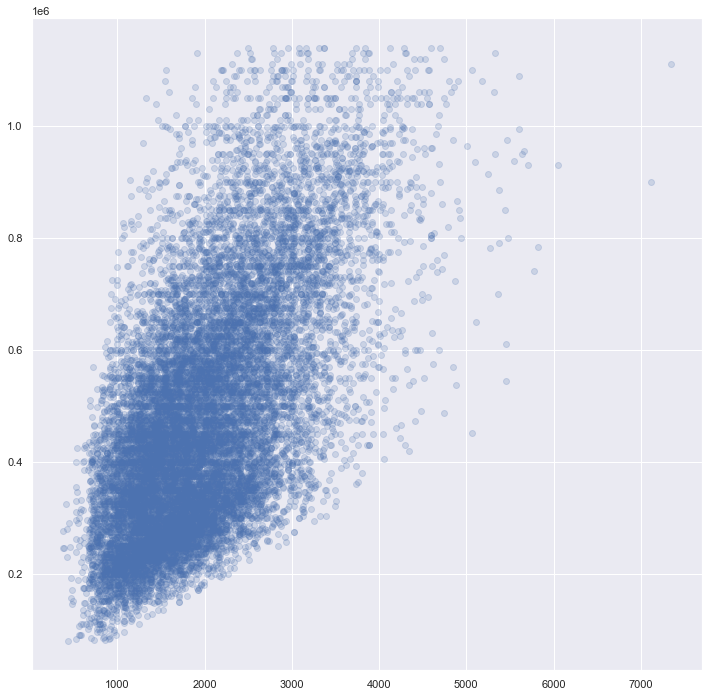

In [48]:
plt.scatter(x =  X_sqftliving, y = y_target, alpha = 0.2);

We can see we do have a strong, positive linear relationship between sqft_living and sale price, so the **linearity assumption is met**.

#### Normality
The normality assumption states that the model residuals should follow a normal distribution. Note that the normality assumption talks about the model residuals and not about the distributions of the variables!

Normality can be checked with histograms, Q-Q plots, or statistical tests like the Jarque-Bera (JB) test.

For this model, let's check the JB test. A JB value of roughly 6 or higher indicates that errors are not normally distributed. A value close to 0 on the contrary, indicates the data is normally distributed.

Here, our JB value is 858.645 its p-value is less than .05 which indicates that we reject the null hypothesis. Thus, we have sufficient evidence to say that this data has skewness and kurtosis that is significantly different from a normal distribution.

Thus, this model **violates the normality assumption**.

We can also explore normality using a Q-Q plot.

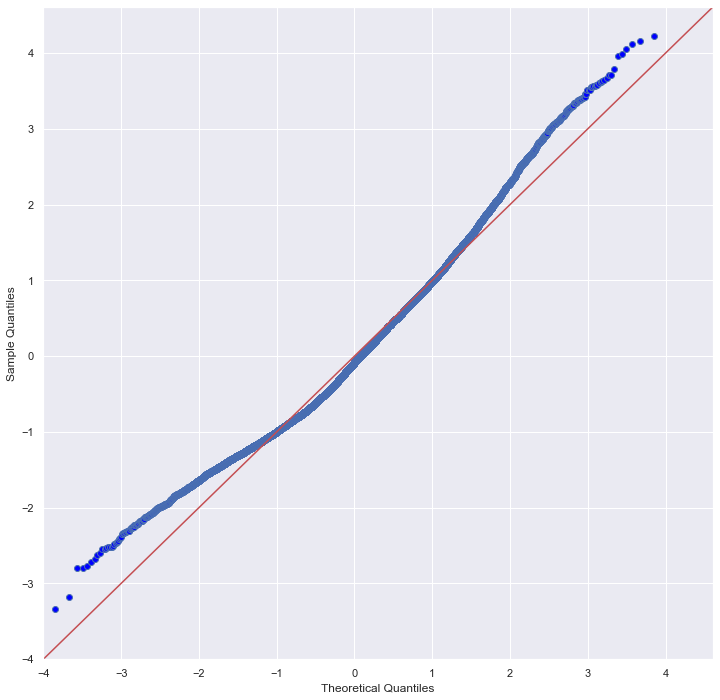

In [49]:
# Visualizing normality

f = 'price ~ sqft_living'
model = smf.ols(formula=f, data=kcdf_clean).fit()

resid1 = model.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

Here, we can visualize the skewness within the distribution of the residuals, in both the left and right tails.

#### Homoscedasticity
We need to check homoscedasticity, which indicates whether a dependent variable's variability is equal across values of the independent variable. To check for homoscedasticity, we'll check the Durbin-Watson score. The acceptable range for the D-W score is 1.5 to 2.5 ([reference](https://www.statology.org/durbin-watson-test/)) and so, with a D-W score of 1.981, it can be stated that the residuals have relative independence and there is no serial correlation between them, so the **assumption of homoscedasticity is met**.

## Iterative Model 1: Considering Quantitative Home Features

To best advise the lead executives of Emerald City Realtors on actions prospectice homesellers can take to increase the estimated value of their home, and by what amount, this model will assess the quantitative features of a home: the number of bedrooms and bathrooms, the number of floors, and the square footage of the home, both living and basement. 

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. Focusing on the quantitative features keeps some consistency in the elements within the model.

In [50]:
# Create our new X for this model
X_quant_features = kcdf_clean[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement']]

In [51]:
# Quantative features model
quant_model = sm.OLS(y_target, sm.add_constant(X_quant_features))
# Includes every feature

results_quant_model = quant_model.fit()
print(results_quant_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2260.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -2.2594e+05
No. Observations:               16842   AIC:                         4.519e+05
Df Residuals:                   16836   BIC:                         4.519e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.589e+05   5542.554     28.665

### Regression Results: Quantitative Home Features Model

**Findings**
Our dependent, target variable is sale price and our explanatory, independent variables are bedrooms, bathrooms, sqft_living, sqft_basement, and floors. This model's performance is minimally better than the baseline - it explains 40% of variance in the data.

The F-test measures the significance of the model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. This model F-statistic has a p-value less than .05 and thus is statistically significant such that all of these quantative features are statistically significant in predicting sale price.

The correlation coefficients for bedrooms, floors, sqft_living, and sqft_basement all have p-values less than 0.05, which indicates they are all statistically significant. This model shows the following:

* Holding all else constant, an increase in one bedroom unit decreases the price by 22,600 dollars
* Holding all else constant, an increase in one bathroom unit decreases the price by 2,495 dollars
* Holding all else constant, an increase in one sqft_living unit increases the price by 172.55 dollars
* Holding all else constant, an increase in one floor unit increases the price by 34,730 dollars
* Holding all else constant, an increase in one sqft_basement unit increases the price by 26.10 dollars

Before making recommendations, let's check the assumptions for this model and explore the utilization of a standardized scale for analysis.

#### Linearity

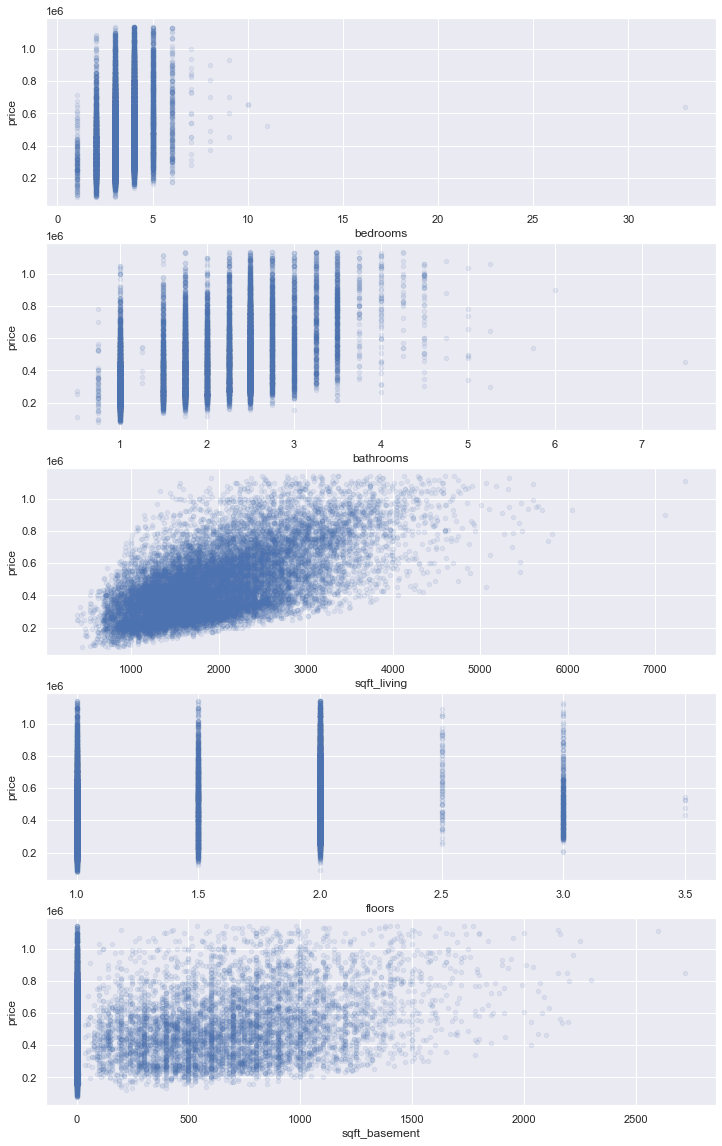

In [52]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,20))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement'], axes):
    kcdf_clean.plot(kind = 'scatter', x = xcol, y = 'price', ax = ax, alpha=0.1, color='b')

Visualizing these features provides interesting insight in that bedrooms, bathrooms, and floors, while are quantitative features of a home, they function more as distinct categories. We can see more of a linear relationship with bathrooms, than say, number of floors.

For continuous, quantitative features - sqft_living and sqft_basement, this model **meets the linearity assumption**.

#### Normality

For normality, our JB value is 1021.18, so our data has skewness and kurtosis that is significantly different from a normal distribution, thus this model violates the normality assumption.

We can also visualize this skewness and kurtosis.

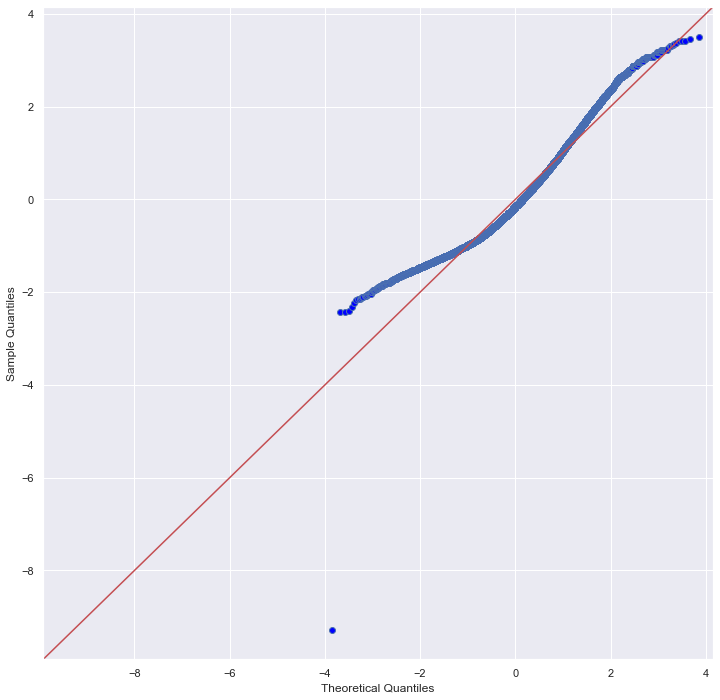

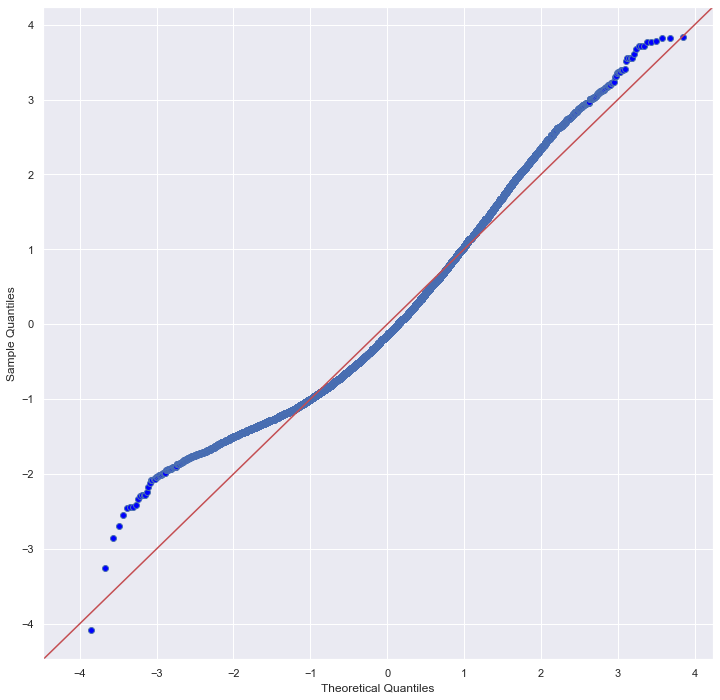

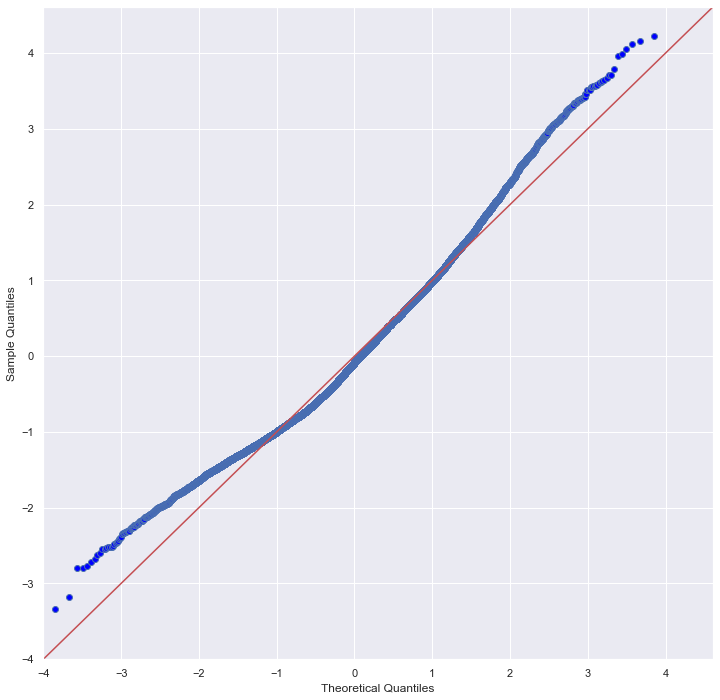

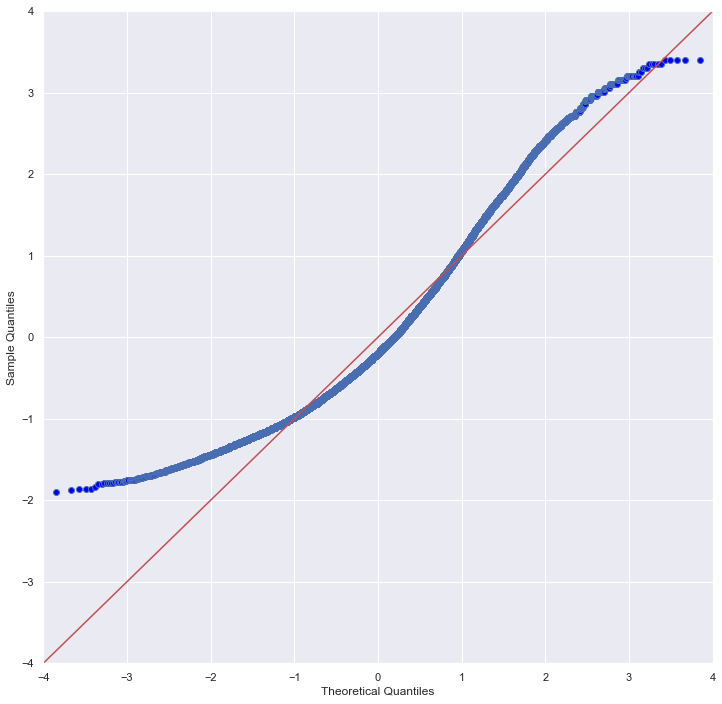

In [53]:
# Visualizing normality

f = 'price ~ bedrooms'
f2 = 'price ~ bathrooms'
f3 = 'price ~ sqft_living'
f4 = 'price ~ sqft_basement'
model = smf.ols(formula=f, data=kcdf_clean).fit()
model2 = smf.ols(formula=f2, data=kcdf_clean).fit()
model3 = smf.ols(formula=f3, data=kcdf_clean).fit()
model4 = smf.ols(formula=f4, data=kcdf_clean).fit()

resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

None of the residual distributions for bedrooms, bathrooms, sqft_living, nor sqft_basement are normal; all four features have an s-curve shape indicating skew.

Thus, this model **violates the normality assumption**.

#### Homoscedasticity

ith a p-value for the F statistic far greater than 0.05, we fail to reject the null hypothesis and determine that this model **violates the homoscedasticity violation**.

In [54]:
# Run Goldfeld Quandt test to further confirm homoscedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_quant_features)
list(zip(name, test))

[('F statistic', 0.9668831878226807), ('p-value', 0.9387890955616993)]

The results of GQ confirms that this model violates the homoscedasticity assumption.

### Apply Standardized Scaling

One note about this model we've been analyzing is that the features are not on the same scale. In other words, the values and coefficients of each feature cannot be compared apples-to-apples as it were. Applying a standard scaler gives us the opportunity to compare across features without considering the different scales of values.

In [55]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit() and .transform() methods.
X_preds = kcdf_clean.drop('price', axis = 1)
ss.fit(X_preds)

X_preds_scaled = ss.transform(X_preds)

X_preds_scaled_df = pd.DataFrame(X_preds_scaled, index = X_preds.index, columns = X_preds.columns)

So, let's rerun our model of quantitative features now with all features on a standardized scale.

In [56]:
# Quant model with standardized scale
X_quant_features_scaled = X_preds_scaled_df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement']]

quant_model_scaled = sm.OLS(y_target, sm.add_constant(X_quant_features_scaled))

results_quant_scaled = quant_model_scaled.fit()
print(results_quant_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     2260.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:56:43   Log-Likelihood:            -2.2594e+05
No. Observations:               16842   AIC:                         4.519e+05
Df Residuals:                   16836   BIC:                         4.519e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.785e+05   1249.692    382.868

**Findings**

The performance metrics of this model are the same as the previous quantitative model; what differs is that large coefficients tend to be more influential and we can make direct comparisons across features.

For example, holding everything else constant, adding an additional level to a home increases the sale price by 18,590 dollars, but an increase of one additional sqft of living space increases sale price by **133,900 dollars**.

**Recommendation**

If homesellers could change one quantitative feature of their home, we would recommend additional sqft of living space. This is a relevant recommendation because it is a possible solution to the problem of the project: advising prospective homesellers on what they can do to increase the sale price of their home.

## Iterative Model 2: Considering Qualitative Home Features

To best advise the lead executives of Emerald City Realtors on actions prospectice homesellers can take to increase the estimated value of their home, and by what amount, this model will assess the qualitative features of a home: the grade of the home (i.e., the construction quality of the home including materials and workmanship), the condition of the home (i.e., condition relative to the age and grade of the home), and renovation status. 

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. Focusing on the qualitative features keeps some consistency in the elements within the model and allows for direct comparison between degrees of characteristics.

In [63]:
# Create our new X for this scaled qual model
X_qual_scaled = X_preds_scaled_df[['cond_Fair', 'cond_Good', 'cond_Poor', 'cond_Very Good',
                              'grade_11 Excellent', 'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low',
                              'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
                              'grade_9 Better', 'reno_Yes']]

# Quantative features model
qual_model_scaled = sm.OLS(y_target, sm.add_constant(X_qual_scaled))
# Includes every feature

results_qual_model_scaled = qual_model_scaled.fit()
print(results_qual_model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     958.3
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:02:08   Log-Likelihood:            -2.2533e+05
No. Observations:               16842   AIC:                         4.507e+05
Df Residuals:                   16827   BIC:                         4.508e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.785e+05   1

### Regression Results: Qualitative Home Features Model

**Findings**

Our dependent, target variable is sale price and our explanatory, independent variables are qualitative features of a home, such as its grade, condition, or renovation status. This model's performance is a bit better than the baseline (39%), explaining 44.3% of variance in the data.

The F-test measures the significance of the model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. This model F-statistic has a p-value less than .05 and thus is statistically significant such that all of these qualitative features are statistically significant in predicting sale price.

All of our features have statistically significant coefficients except Poor and Fair conditions and a Luxury grade, none of which have a statistically significant linear relationship to sale price.

The most influential features show the following impact on sale price:

* Increasing a home's condition from Good to Very Good increases the sale price by 9,950 dollars (meaning that all home items are well maintained, many having been overhauled and repaired)
* Renovating a home increases the sale price by **23,300 dollars**
* Improving a home's grade from Grade 9 (Better) to Grade 11 (Excellent) increases the sale price by **53,070 dollars** (meaning that the home has custom design features and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options)

**Recommendations**

1. Advise potential homesellers to renovate their home, focusing on well-maintained home items, custom features, high quality finishes, and more luxurious options, which would increase the sale price by **76,370 dollars**

### Checking Assumptions of the Qualitative Home Features Model

#### Linearity

With categorical features such as grade and condition, the linearity assumption is essentially empty, so there is nothing to check.

#### Normality

For normality, our JB value is 1266.75, so our data has skewness and kurtosis that is significantly different from a normal distribution, thus this model **violates the normality assumption**.

#### Homoscedasticity

Based on the GQ test results, this model **fails the homoscedasticity assumption**.

In [58]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_qual_scaled)
list(zip(name, test))

[('F statistic', 0.09642214493783587), ('p-value', 0.9999999999999999)]

## Iterative Model 3: Considering Most Influential Home Features

To best advise the lead executives of Emerald City Realtors on actions prospectice homesellers can take to increase the estimated value of their home, and by what amount, this model will assess the most influential features from our previous two models (both the quantitative and qualitative models): square footage of living areas, Good and Very Good conditions of materials and workmanship quality, and Excellent grade (indicating custom design and luxurious finishes).

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. Focusing on the most influential home features keeps some consistency in the elements within the model and allows for direct comparison between degrees of characteristics.

In [59]:
# Create our new X for this scaled qual model
X_influ_scaled = X_preds_scaled_df[['cond_Good', 'cond_Very Good', 'grade_11 Excellent', 'reno_Yes',
                                   'sqft_living', 'floors']]

# Quantative features model
influ_model_scaled = sm.OLS(y_target, sm.add_constant(X_influ_scaled))
# Includes every feature

results_influ_model_scaled = influ_model_scaled.fit()
print(results_influ_model_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1989.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:56:44   Log-Likelihood:            -2.2575e+05
No. Observations:               16842   AIC:                         4.515e+05
Df Residuals:                   16835   BIC:                         4.516e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.785e+05   1235

### Regression Results: Most Influential Home Features Model

**Findings**

Our dependent, target variable is sale price and our explanatory, independent variables are the most influential features as measured by our previous models: sqft_living, Good and Very Good conditions, renovation status, Excellent( Grade 11), and number of floors.

This model's performance is a bit better than the baseline (39%), explaining 41.5% of the variance, which, while better than the baseline, does not perform as well as the full qualitative model.

The F-test measures the significance of the model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. This model F-statistic has a p-value less than .05 and thus is statistically significant such that all of these qualitative features are statistically significant in predicting sale price.

All of our features have statistically significant coefficients indicating a linear relationship with sale price and have the following effect on sale price:

* Increasing a home's condition from Good to Very Good increases the sale price by 7,400 dollars
* Renovating a home increases the sale price by **17,880 dollars**
* Increasing the square footage of living area increases the sale price by **123,000 dollars**

**Recommendations**

1. Complete a renovation project to add square footage of living space to the home, which can increase the sale price of the home by **140,880 dollars**

### Checking Assumptions of the Most Influential Home Features Model

#### Linearity

With categorical features such as grade and condition, the linearity assumption is essentially empty, so there is nothing to check.

#### Normality

For normality, our JB value is 766.997, so our data has skewness and kurtosis that is significantly different from a normal distribution, thus this model **violates the normality assumption**.

#### Homoscedasticity

Based on the GQ test results, this model **fails the homoscedasticity assumption**.

In [64]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_influ_scaled)
list(zip(name, test))

[('F statistic', 0.9993949699629986), ('p-value', 0.5110725284615705)]

## Iterative Model 4: Considering All Home Features

To best advise the lead executives of Emerald City Realtors on actions prospectice homesellers can take to increase the estimated value of their home, and by what amount, this model will assess all home features that homesellers can change or improve upon to increase the price of their home.

We are creating this model within the context of our problem, intending to improve the results of our baseline model by adding to the complexity of the features within the model. This model looks at all features homesellers have control over.

In [60]:
X_preds_scaled_df.drop(columns = ['waterfront_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
                                 'yr_built'], inplace = True)

In [65]:
# Big model with standardized scale
model_all_preds_scaled = sm.OLS(y_target, sm.add_constant(X_preds_scaled_df))
# Includes every feature

results_all_preds_scaled = model_all_preds_scaled.fit()
print(results_all_preds_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     899.3
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:09:15   Log-Likelihood:            -2.2436e+05
No. Observations:               16842   AIC:                         4.488e+05
Df Residuals:                   16822   BIC:                         4.489e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.785e+05   1

### Regression Results: All Home Features Model

**Findings**

Our dependent, target variable is sale price and our explanatory, independent variables are all home features that owners have the capacity to change in order to affect sale price, including square footage, bedrooms, grade, condition, and renovations.

This model performs better than our previous three models, with an adjusted R-squared of 50.3%.

All of our features have statistically significant coefficients except Poor and Fair conditions and Grade 12 (Luxury), neither of which have a statistically significant linear relationship to sale price. The coefficients demonstrate that:

* Increasing a home's condition from Fair to Good increases the sale price by **19,367 dollars**
* Increasing a home's condition from Good to Very Good increases the sale price by 8,840 dollars
* Renovating a home increases the sale price by **20,260 dollars**
* Increasing the square footage of living area by one unit increases the sale price by **65,920 dollars**

**Recommendations**

1. Complete a renovation project to add square footage of living space to the home, which can increase the sale price of the home by **140,880 dollars**

### Checking Assumptions of the Most Influential Home Features Model

#### Linearity

With categorical features such as grade and condition, the linearity assumption is essentially empty, so there is nothing to check.

#### Normality

For normality, our JB value is 766.997, so our data has skewness and kurtosis that is significantly different from a normal distribution, thus this model **violates the normality assumption**.

#### Homoscedasticity

Based on the GQ test results, this model **fails the homoscedasticity assumption**.

In [67]:
# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_target, X_preds_scaled_df)
list(zip(name, test))

[('F statistic', 0.08687383957795115), ('p-value', 0.9999999999999999)]

# Recommendations

Our final model, looking at all home features homesellers can control to improve the sale price of their home, performs the best when compared to the baseline model.

Based on the effect all these features have on sale price, Emerald City Realtors should recommend to prospective homesellers that they complete a renovation project to add square footage of living space to the home, which can increase the sale price of the home by 140,880 dollars.

If increasing the square footage of the home is impossible, we should recommend a renovation project that improves a home's condition from Fair to Good, which would increase the sale price of the home by 39,627 dollars.